In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import umap
from sklearn.manifold import SpectralEmbedding
from sklearn.manifold import TSNE
from sklearn.linear_model import LinearRegression

# read in the data from 3M_system_data.csv

df = pd.read_csv('3M_system_data_0.125.csv')

# print the first 5 rows of the data
df.head()

,a13,a23,e1,e2,N1_f,N2_f,M1_f,M2_f,N1'_f,N2'_f,M1'_f,M2'_f
0,-2.0,-2.0,-2.0,-2.000,0.769231,1.025641,0.615385,0.384615,-2.331468e-15,6.661338e-16,1.581153e-15,-5.819521e-16
1,-2.0,-2.0,-2.0,-1.875,0.769231,1.025641,0.615385,0.384615,4.440892e-16,-1.998401e-15,-5.270509e-16,5.270509e-16
2,-2.0,-2.0,-2.0,-1.750,0.769231,1.025641,0.615385,0.384615,2.886580e-15,-1.776357e-15,-2.049643e-16,5.142407e-16
3,-2.0,-2.0,-2.0,-1.625,0.769231,1.025641,0.615385,0.384615,5.551115e-16,2.220446e-16,6.368532e-16,2.552903e-16
4,-2.0,-2.0,-2.0,-1.500,0.769231,1.025641,0.615385,0.384615,-8.881784e-16,-1.776357e-15,-1.698275e-15,1.317627e-15


In [34]:
# keep all rows where N1_f >= 0 and N2_f >= 0

df = df[(df['N1_f'] >= 0) & (df['N2_f'] >= 0)]

# reassign all values less than 10^(-6) to 0

df.loc[df['N1_f'] < 10**(-6), 'N1_f'] = 0

df.loc[df['N2_f'] < 10**(-6), 'N2_f'] = 0

# keep columns a13, a12, e1, e2, N1_f, N2_f, M1_f, and M2_f

df = df[['a13', 'a23', 'e1', 'e2', 'N1_f', 'N2_f', 'M1_f', 'M2_f']]

df.head()

,a13,a23,e1,e2,N1_f,N2_f,M1_f,M2_f
0,-2.0,-2.0,-2.0,-2.000,0.769231,1.025641,0.615385,0.384615
1,-2.0,-2.0,-2.0,-1.875,0.769231,1.025641,0.615385,0.384615
2,-2.0,-2.0,-2.0,-1.750,0.769231,1.025641,0.615385,0.384615
3,-2.0,-2.0,-2.0,-1.625,0.769231,1.025641,0.615385,0.384615
4,-2.0,-2.0,-2.0,-1.500,0.769231,1.025641,0.615385,0.384615


In [35]:
# add a column to the dataframe which has a 1 if N1_f and N2_f == 0, a 2 if N1_f == 0 and N2_f != 0, a 3 if N2_f != 0 and N2_f == 0, and 0 otherwise

df_cluster = df.copy()

df_cluster['cluster'] = 0

df_cluster.loc[(df_cluster['N1_f'] == 0) & (df_cluster['N2_f'] == 0), 'cluster'] = 1

df_cluster.loc[(df_cluster['N1_f'] == 0) & (df_cluster['N2_f'] != 0), 'cluster'] = 2

df_cluster.loc[(df_cluster['N1_f'] != 0) & (df_cluster['N2_f'] == 0), 'cluster'] = 3

df_cluster.head()

,a13,a23,e1,e2,N1_f,N2_f,M1_f,M2_f,cluster
0,-2.0,-2.0,-2.0,-2.000,0.769231,1.025641,0.615385,0.384615,0
1,-2.0,-2.0,-2.0,-1.875,0.769231,1.025641,0.615385,0.384615,0
2,-2.0,-2.0,-2.0,-1.750,0.769231,1.025641,0.615385,0.384615,0
3,-2.0,-2.0,-2.0,-1.625,0.769231,1.025641,0.615385,0.384615,0
4,-2.0,-2.0,-2.0,-1.500,0.769231,1.025641,0.615385,0.384615,0


In [36]:
# keep columns a13, a12, e1, e2

df = df[['a13', 'a23', 'e1', 'e2']]

df.head()

,a13,a23,e1,e2
0,-2.0,-2.0,-2.0,-2.000
1,-2.0,-2.0,-2.0,-1.875
2,-2.0,-2.0,-2.0,-1.750
3,-2.0,-2.0,-2.0,-1.625
4,-2.0,-2.0,-2.0,-1.500


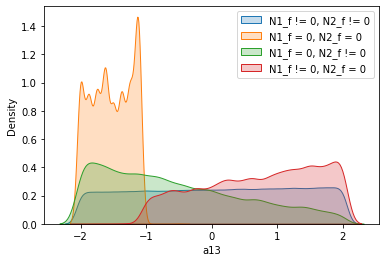

In [37]:
# plot overlaid kde plots for a13 from df_cluster subset to when cluster == 1, 2, and 3 with a key to explain fills

sns.kdeplot(df_cluster[df_cluster['cluster'] == 0]['a13'], fill=True, label='N1_f != 0, N2_f != 0')
sns.kdeplot(df_cluster[df_cluster['cluster'] == 1]['a13'], fill=True, label='N1_f = 0, N2_f = 0')
sns.kdeplot(df_cluster[df_cluster['cluster'] == 2]['a13'], fill=True, label='N1_f = 0, N2_f != 0')
sns.kdeplot(df_cluster[df_cluster['cluster'] == 3]['a13'], fill=True, label='N1_f != 0, N2_f = 0')

plt.legend()

<AxesSubplot:xlabel='a23', ylabel='Density'>

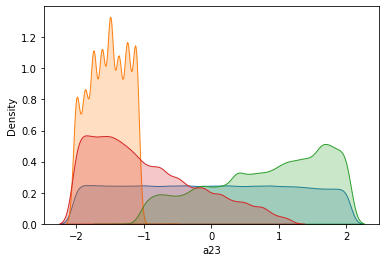

In [38]:
# plot overlaid kde plots for a23 from df_cluster subset to when cluster == 1, 2, and 3 with a key to explain fills

sns.kdeplot(df_cluster[df_cluster['cluster'] == 0]['a23'], fill=True, label='N1_f != 0, N2_f != 0')
sns.kdeplot(df_cluster[df_cluster['cluster'] == 1]['a23'], fill=True, label='N1_f = 0, N2_f = 0')
sns.kdeplot(df_cluster[df_cluster['cluster'] == 2]['a23'], fill=True, label='N1_f = 0, N2_f != 0')
sns.kdeplot(df_cluster[df_cluster['cluster'] == 3]['a23'], fill=True, label='N1_f != 0, N2_f = 0')

# plt.legend()

<AxesSubplot:xlabel='e1', ylabel='Density'>

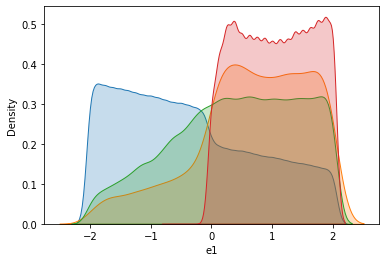

In [39]:
# plot overlaid kde plots for e1 from df_cluster subset to when cluster == 1, 2, and 3 with a key to explain fills

sns.kdeplot(df_cluster[df_cluster['cluster'] == 0]['e1'], fill=True, label='N1_f != 0, N2_f != 0')
sns.kdeplot(df_cluster[df_cluster['cluster'] == 1]['e1'], fill=True, label='N1_f = 0, N2_f = 0')
sns.kdeplot(df_cluster[df_cluster['cluster'] == 2]['e1'], fill=True, label='N1_f = 0, N2_f != 0')
sns.kdeplot(df_cluster[df_cluster['cluster'] == 3]['e1'], fill=True, label='N1_f != 0, N2_f = 0')

# plt.legend()

<AxesSubplot:xlabel='e2', ylabel='Density'>

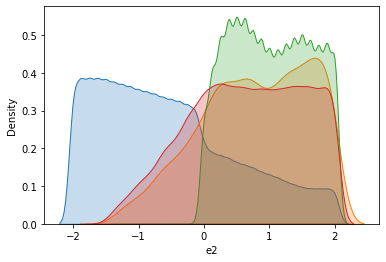

In [40]:
# plot overlaid kde plots for e2 from df_cluster subset to when cluster == 1, 2, and 3 with a key to explain fills

sns.kdeplot(df_cluster[df_cluster['cluster'] == 0]['e2'], fill=True, label='N1_f != 0, N2_f != 0')
sns.kdeplot(df_cluster[df_cluster['cluster'] == 1]['e2'], fill=True, label='N1_f = 0, N2_f = 0')
sns.kdeplot(df_cluster[df_cluster['cluster'] == 2]['e2'], fill=True, label='N1_f = 0, N2_f != 0')
sns.kdeplot(df_cluster[df_cluster['cluster'] == 3]['e2'], fill=True, label='N1_f != 0, N2_f = 0')

# plt.legend()

In [41]:
# create a new dataframe with the columns a13, a23, e1, and e2 from df_cluster subset to when cluster == 1, 2, and 3

df_invasion = df[df_cluster['cluster'] != 0]

# create a new dataframe with the columns a13, a23, e1, and e2 from df_cluster subset to when cluster == 0

df_no_invasion = df[df_cluster['cluster'] == 0]

Text(0, 0.5, 'a23')

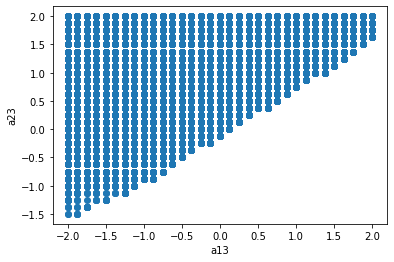

In [43]:
x = df[df_cluster['cluster'] == 2]['a13'].values.reshape(-1, 1)

y = df[df_cluster['cluster'] == 2]['a23'].values.reshape(-1, 1)

plt.scatter(x, y)

plt.xlabel('a13')

plt.ylabel('a23')

In [10]:
# downsample df_no_invasion to only include rows where parameters are divisible by z

z = 0.5

df_no_invasion_downsample = df_no_invasion[(df_no_invasion['a13'] % z == 0) & (df_no_invasion['a23'] % z == 0) & (df_no_invasion['e1'] % z == 0) & (df_no_invasion['e2'] % z == 0)]

# downsample df_invasion to only include rows where parameters are divisible by z

z = 0.25

df_invasion_downsample = df_invasion[(df_invasion['a13'] % z == 0) & (df_invasion['a23'] % z == 0) & (df_invasion['e1'] % z == 0) & (df_invasion['e2'] % z == 0)]

In [11]:
# compute the pca for df_no_invasion_downsample

pca = PCA(n_components=2)

pca.fit(df_no_invasion_downsample)

df_no_invasion_downsample_pca = pca.transform(df_no_invasion_downsample)

# compute the UMAP for df_no_invasion_downsample

reducer = umap.UMAP()

df_no_invasion_downsample_umap = reducer.fit_transform(df_no_invasion_downsample)

# compute laplacian eigenmaps for df_no_invasion_downsample

laplacian = SpectralEmbedding(n_components=2, affinity='nearest_neighbors')

df_no_invasion_downsample_laplacian = laplacian.fit_transform(df_no_invasion_downsample)

# compute the t-SNE for df_no_invasion_downsample

tsne = TSNE(n_components=2)

df_no_invasion_downsample_tsne = tsne.fit_transform(df_no_invasion_downsample)


c:\Users\William Parker\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\William Parker\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Text(0.5, 1.0, 't-SNE')

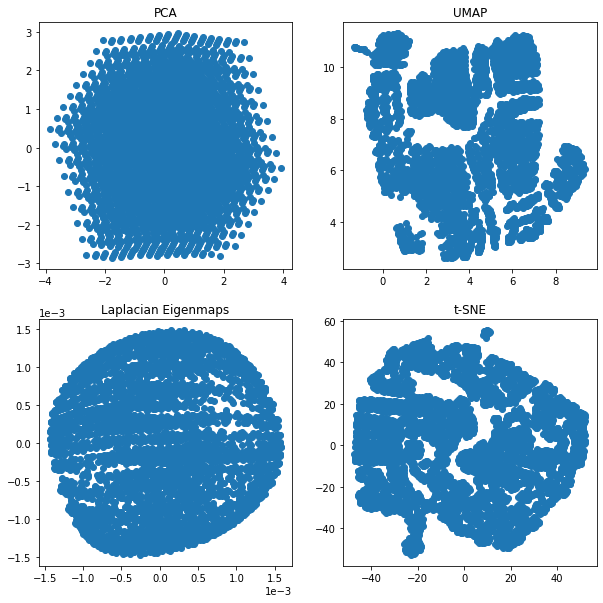

In [12]:
# plot the results of the pca, umap, laplacian, and t-SNE for df_no_invasion_downsample on a 2x2 grid

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

axs[0, 0].scatter(df_no_invasion_downsample_pca[:, 0], df_no_invasion_downsample_pca[:, 1])

axs[0, 0].set_title('PCA')

axs[0, 1].scatter(df_no_invasion_downsample_umap[:, 0], df_no_invasion_downsample_umap[:, 1])

axs[0, 1].set_title('UMAP')

axs[1, 0].scatter(df_no_invasion_downsample_laplacian[:, 0], df_no_invasion_downsample_laplacian[:, 1])

axs[1, 0].set_title('Laplacian Eigenmaps')

axs[1, 0].ticklabel_format(style='sci', axis='x', scilimits=(0,0))

axs[1, 0].ticklabel_format(style='sci', axis='y', scilimits=(0,0))

axs[1, 1].scatter(df_no_invasion_downsample_tsne[:, 0], df_no_invasion_downsample_tsne[:, 1])

axs[1, 1].set_title('t-SNE')


In [13]:
# compute the pca for df_invasion_downsample

pca = PCA(n_components=2)

pca.fit(df_invasion_downsample)

df_invasion_downsample_pca = pca.transform(df_invasion_downsample)

# compute the UMAP for df_invasion_downsample

reducer = umap.UMAP()

df_invasion_downsample_umap = reducer.fit_transform(df_invasion_downsample)

# compute laplacian eigenmaps for df_invasion_downsample

laplacian = SpectralEmbedding(n_components=2, affinity='nearest_neighbors')

df_invasion_downsample_laplacian = laplacian.fit_transform(df_invasion_downsample)

# compute the t-SNE for df_invasion_downsample

tsne = TSNE(n_components=2)

df_invasion_downsample_tsne = tsne.fit_transform(df_invasion_downsample)

c:\Users\William Parker\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\William Parker\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [17]:
# downsample df_cluster to only include rows where parameters are divisible by z and cluster != 0

z = 0.25

df_cluster_downsample = df_cluster[(df_cluster['a13'] % z == 0) & (df_cluster['a23'] % z == 0) & (df_cluster['e1'] % z == 0) & (df_cluster['e2'] % z == 0) & (df_cluster['cluster'] != 0)]

df_cluster_downsample.shape

(12028, 9)

Text(0.5, 1.0, 't-SNE')

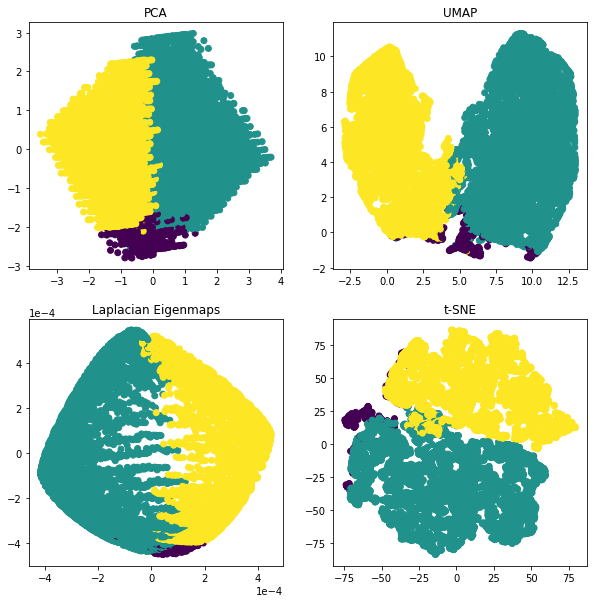

In [18]:
# plot the results of the pca, umap, laplacian, and t-SNE for df_invasion_downsample on a 2x2 grid color coded by cluster with corresponding labels for legend

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

axs[0, 0].scatter(df_invasion_downsample_pca[:, 0], df_invasion_downsample_pca[:, 1], c=df_cluster_downsample['cluster'], cmap='viridis')

axs[0, 0].set_title('PCA')

axs[0, 1].scatter(df_invasion_downsample_umap[:, 0], df_invasion_downsample_umap[:, 1], c=df_cluster_downsample['cluster'], cmap='viridis')

axs[0, 1].set_title('UMAP')

axs[1, 0].scatter(df_invasion_downsample_laplacian[:, 0], df_invasion_downsample_laplacian[:, 1], c=df_cluster_downsample['cluster'], cmap='viridis')

axs[1, 0].set_title('Laplacian Eigenmaps')

axs[1, 0].ticklabel_format(style='sci', axis='x', scilimits=(0,0))

axs[1, 0].ticklabel_format(style='sci', axis='y', scilimits=(0,0))

axs[1, 1].scatter(df_invasion_downsample_tsne[:, 0], df_invasion_downsample_tsne[:, 1], c=df_cluster_downsample['cluster'], cmap='viridis')

axs[1, 1].set_title('t-SNE')